# Proyecto Final

Realizado por Juan Martin Sanchez y Carlos Montiel

#Preparacion de Dataset

### Enlace a Drive de Colab

In [ ]:
#Linking a Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports necesarios para el funcionamiento

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Lectura de CSVs y Visualizacion de Dataset Crudo

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
test=pd.read_csv('/content/drive/MyDrive/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')
features=pd.read_csv('/content/drive/MyDrive/UNSW-NB15 - CSV Files/NUSW-NB15_features.csv',encoding='cp1252')
event_list=pd.read_csv('/content/drive/MyDrive/UNSW-NB15 - CSV Files/UNSW-NB15_LIST_EVENTS.csv')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000



# Preprocesamiento

##Preprocesamiento training

### Descartamiento de features innecesarias
Se quita  la columna id ya que esta es un indice no descriptivo que no aporta en nada al analisis de datos. Igualmente se quita la columna attack_cat ya que es una extension de la columna target, al final no aportara nada.

In [ ]:
train.drop(['id','attack_cat'],axis=1,inplace=True)
train.describe(include='all')

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
unique,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000


In [ ]:
train_numeric = train.select_dtypes(include=[np.number])
train_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


###Clamping
Se procede a reducir los valores extremos que tienen un valor equivalente o mayor a 10 veces de la media, son reducidos hacia el percentil 95. Valores sumamente grandes son transformados, otros valores no son transformados.

In [ ]:
DEBUG =0

for feature in train_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(train_numeric[feature].max()))
        print('75th = '+str(train_numeric[feature].quantile(0.95)))
        print('median = '+str(train_numeric[feature].median()))
        print(train_numeric[feature].max()>10*train_numeric[feature].median())
        print('----------------------------------------------------')
    if train_numeric[feature].max()>10*train_numeric[feature].median() and train_numeric[feature].max()>10 :
        train[feature] = np.where(train[feature]<train[feature].quantile(0.95), train[feature], train[feature].quantile(0.95))

train_numeric = train.select_dtypes(include=[np.number])
train_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,...,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,...,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,...,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


###Aplicacion de la funcion logaritmica

Se esta buscando valores por feature que sean mayor a 50, en este caso se aplica la funcion de logaritmo a estos valores ya que se asume que una feature que tiene mas de 50 valores numericos esta actuando como categorica

In [ ]:
train_numeric = train.select_dtypes(include=[np.number])
train_before = train_numeric.copy()
DEBUG = 0
for feature in train_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(train_numeric[feature].nunique()))
        print(train_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if train_numeric[feature].nunique()>50:
        if train_numeric[feature].min()==0:
            train[feature] = np.log(train[feature]+1)
        else:
            train[feature] = np.log(train[feature])

train_numeric = train.select_dtypes(include=[np.number])

In [ ]:
train_cat = train.select_dtypes(exclude=[np.number])
train_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


### Reduccion de cardinalidad
Si se tiene features con mas de 5 o 6 por campo se lo reduce, el resto de features se los reemplaza como -. Esto reduce dimensionalidad.

In [ ]:
DEBUG = 0
for feature in train_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(train_cat[feature].nunique()))
        print(train_cat[feature].nunique()>6)
        print(sum(train[feature].isin(train[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if train_cat[feature].nunique()>6:
        train[feature] = np.where(train[feature].isin(train[feature].value_counts().head().index), train[feature], '-')


train_cat = train.select_dtypes(exclude=[np.number])
train_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
train['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

###Encodificacion de features
Con el fin de darles valor a las features, las features que no tienen valores numericos y que aporten al modelo son codificadas por medio de one hot encoding. Todas estas features tienen un valor numerico. Al no ser features de orden se usa one hot encoding, si no se deberia usar otro metodo

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_train.head()
feature_names = list(X_train.columns)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
np.shape(X_train)
train_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [ ]:
len(feature_names)

42

In [ ]:
for label in list(train_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(train_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(train_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
len(feature_names)

56

##Preprocesamiento testing


###Resumen
Se lleva a cabo el mismo proceso de preprocesamiento en el dataset de testing, no hace nada con este dataset ya que se busca no hacer overfitting o contaminacion de datos. Este dataset es usado unicamente para las predicciones finales con el fin de ver el rendimiento de los diferentes modelos,

In [ ]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
test.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,175341.000000,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341,175341.000000
unique,NaN,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56000,NaN
mean,87671.000000,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,...,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,NaN,0.680622
std,50616.731112,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,...,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,NaN,0.466237
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,43836.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,87671.000000,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,131506.000000,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,...,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,NaN,1.000000


In [ ]:
test.drop(['id','attack_cat'],axis=1,inplace=True)
test.describe(include='all')

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341,175341,175341,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
unique,NaN,133,13,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tcp,-,INT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,79946,94168,82275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.359389,NaN,NaN,NaN,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,NaN,NaN,NaN,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,NaN,NaN,NaN,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,NaN,NaN,NaN,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000


In [ ]:
test_numeric = test.select_dtypes(include=[np.number])
test_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
test_numeric = test.select_dtypes(include=[np.number])
test_before = test_numeric.copy()
DEBUG = 0
for feature in test_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(test_numeric[feature].nunique()))
        print(test_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if test_numeric[feature].nunique()>50:
        if test_numeric[feature].min()==0:
            test[feature] = np.log(test[feature]+1)
        else:
            test[feature] = np.log(test[feature])

test_numeric = test.select_dtypes(include=[np.number])

test_cat = test.select_dtypes(exclude=[np.number])
test_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,133,13,9
top,tcp,-,INT
freq,79946,94168,82275


In [ ]:
DEBUG = 0
for feature in test_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(test_cat[feature].nunique()))
        print(test_cat[feature].nunique()>6)
        print(sum(test[feature].isin(test[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if test_cat[feature].nunique()>6:
        test[feature] = np.where(test[feature].isin(test[feature].value_counts().head().index), test[feature], '-')


test_cat = test.select_dtypes(exclude=[np.number])
test_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,6,5,6
top,tcp,-,INT
freq,79946,100270,82275


In [ ]:
test['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
X_test.head()
feature_names_test = list(X_test.columns)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X_test = np.array(ct.fit_transform(X_test))
np.shape(X_test)
test_cat.describe(include='all')

,proto,service,state
count,175341,175341,175341
unique,6,5,6
top,tcp,-,INT
freq,79946,100270,82275


In [ ]:
X_test[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14647458e-01, 1.79175947e+00, 1.60943791e+00,
       5.55295958e+00, 5.15329159e+00, 4.31865397e+00, 2.52000000e+02,
       2.54000000e+02, 9.55817230e+00, 9.04739373e+00, 0.00000000e+00,
       0.00000000e+00, 3.23063047e+00, 2.23804657e+00, 3.43969819e+00,
       2.55183325e+00, 2.55000000e+02, 2.02480851e+01, 2.15128742e+01,
       2.55000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.76120012e+00, 3.78418963e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
len(feature_names_test)

42

In [ ]:
for label in list(test_cat['state'].value_counts().index)[::-1][1:]:
    feature_names_test.insert(0,label)
    
for label in list(test_cat['service'].value_counts().index)[::-1][1:]:
    feature_names_test.insert(0,label)
    
for label in list(test_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names_test.insert(0,label)

len(feature_names_test)

56

In [ ]:
print(train.describe())


                dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  82332.000000   
mean       0.285416      1.774664      1.396991      6.246847      3.938930   
std        0.381427      1.152950      1.385679      1.442026      3.700028   
min        0.000000      0.000000      0.000000      3.178054      0.000000   
25%        0.000008      0.693147      0.000000      4.736198      0.000000   
50%        0.014039      1.791759      1.098612      6.280396      5.187386   
75%        0.541952      2.484907      2.397895      7.154615      6.863803   
max        1.224890      4.094345      4.007333      9.431241     10.329507   

               rate          sttl          dttl         sload         dload  \
count  82332.000000  82332.000000  82332.000000  82332.000000  82332.000000   
mean       7.480228    180.967667     95.713003     13.549943      5.800992   
std        4.099853    101.513358    116.667722    

##Chequeo de Balance de Dataset

Se chequea si el dataset tiene desbalance en las diferentes features. Se puede ver que al encodificar entre ataque/no ataque abunda mas la categoria de ataque en el caso de querer hacer un modelo de multiclases

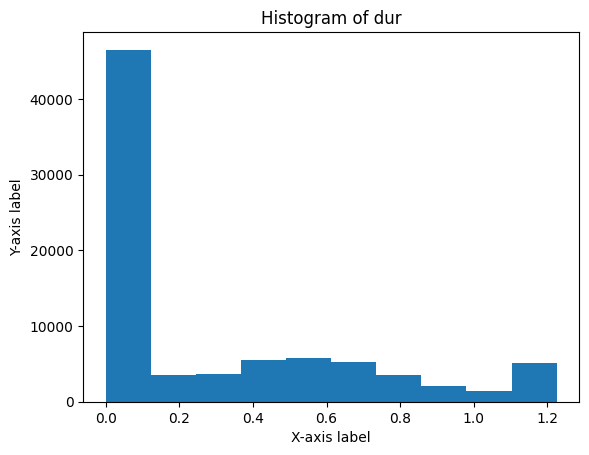

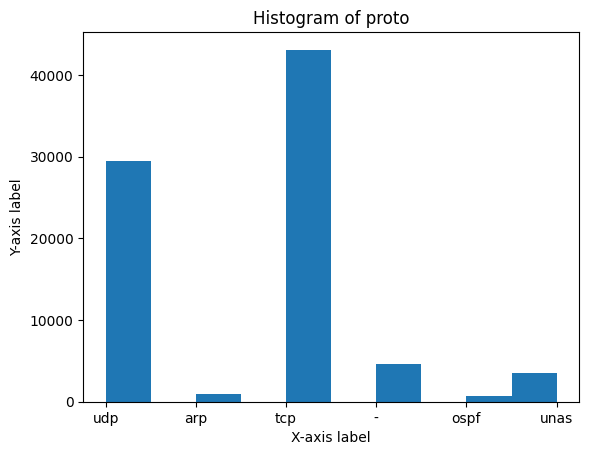

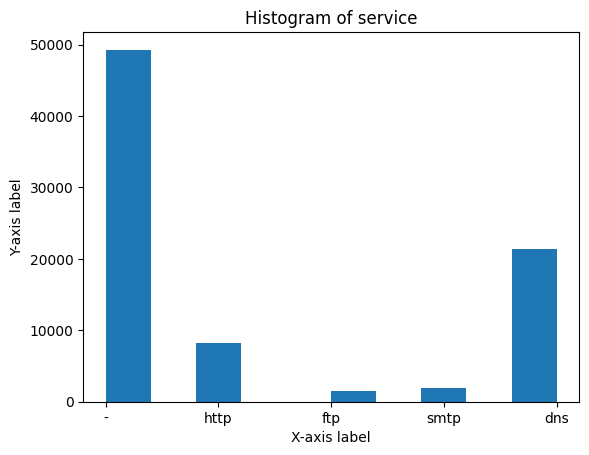

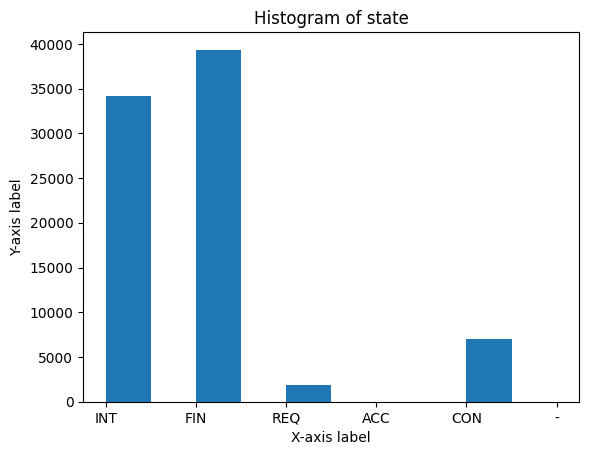

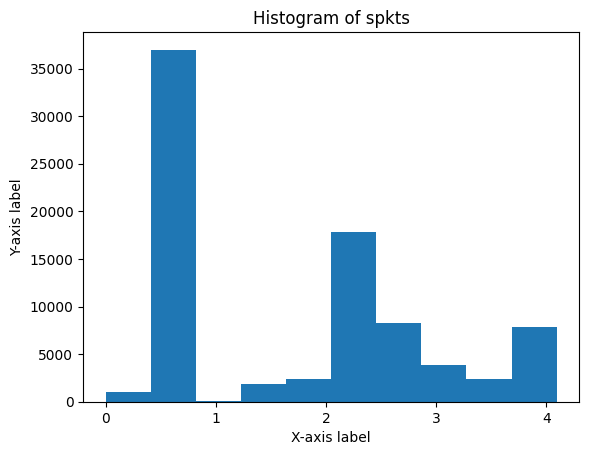

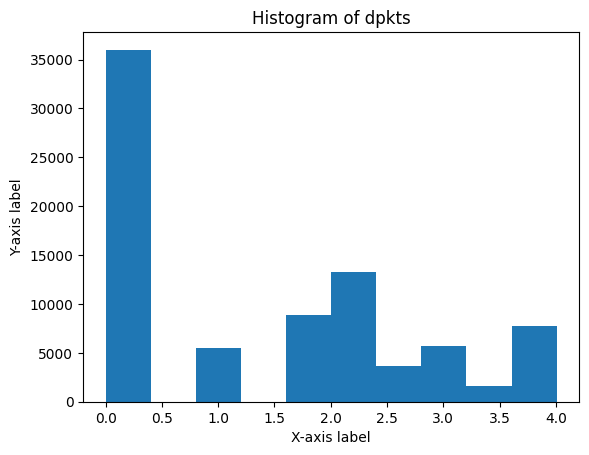

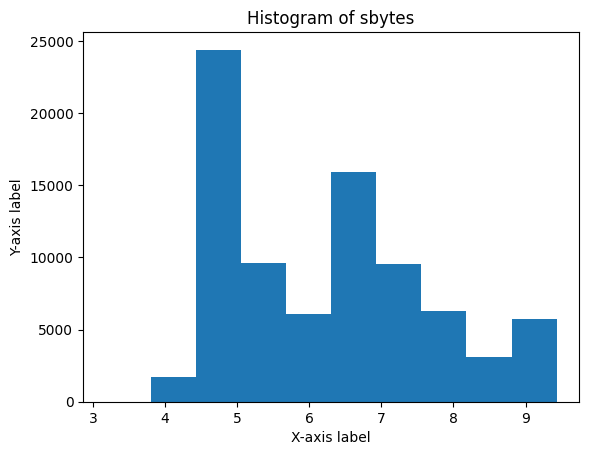

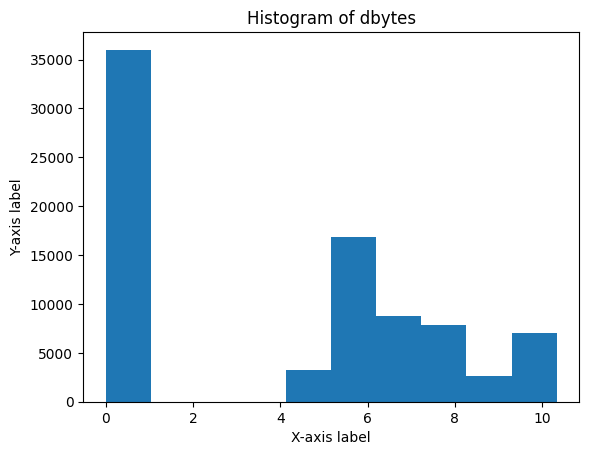

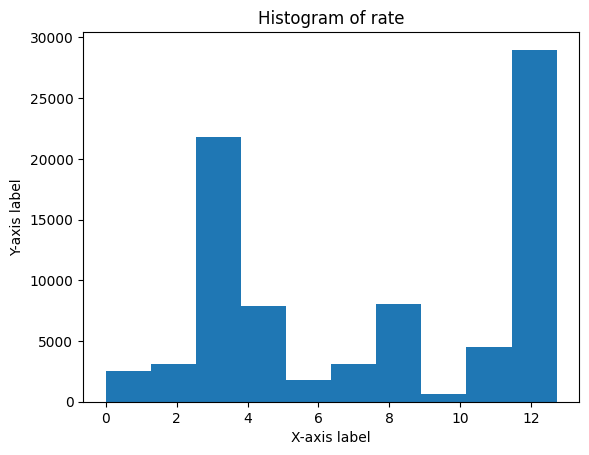

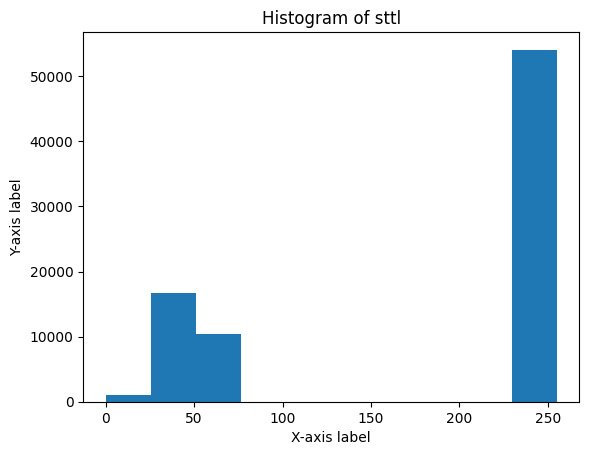

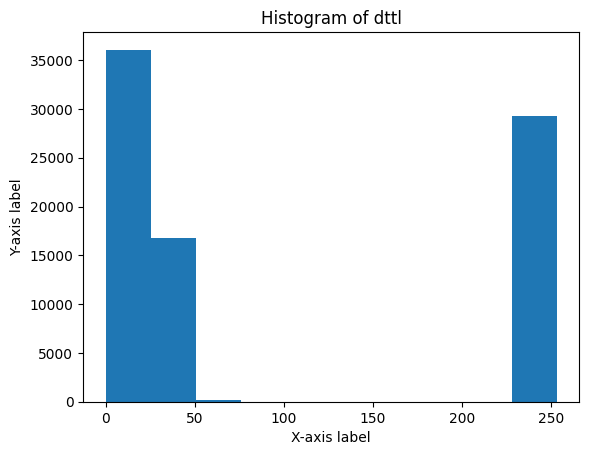

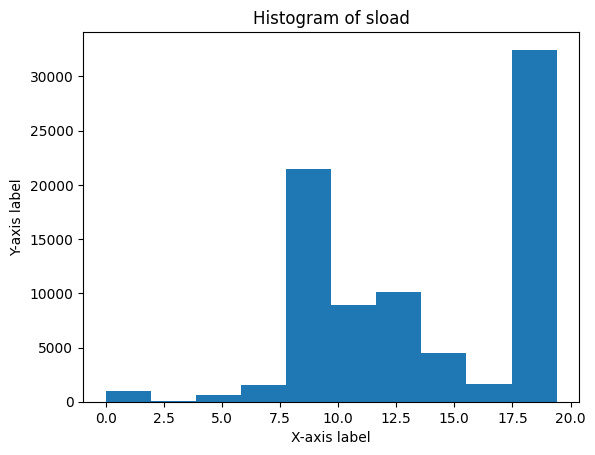

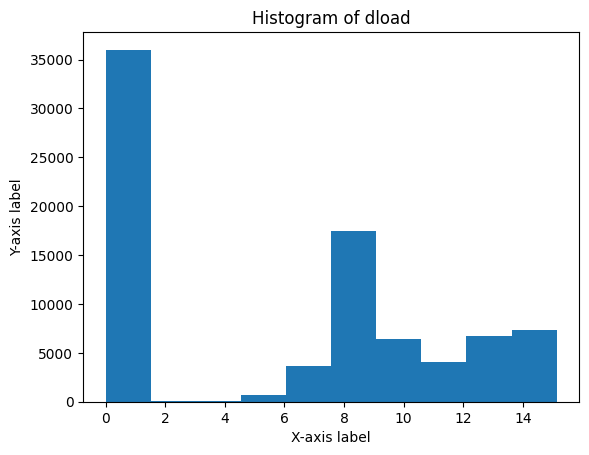

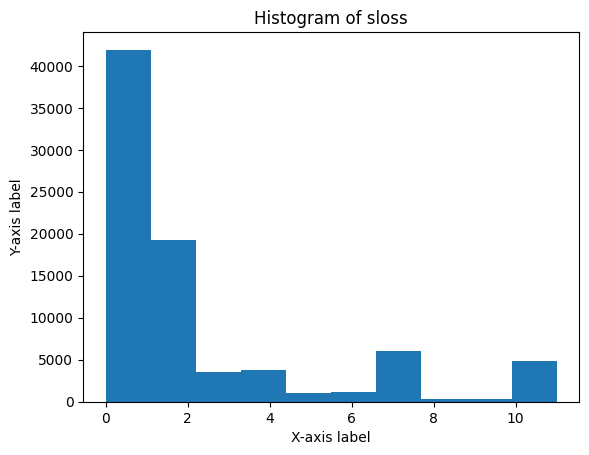

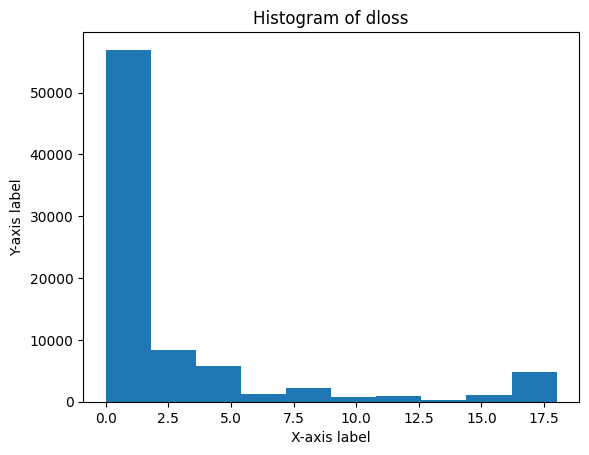

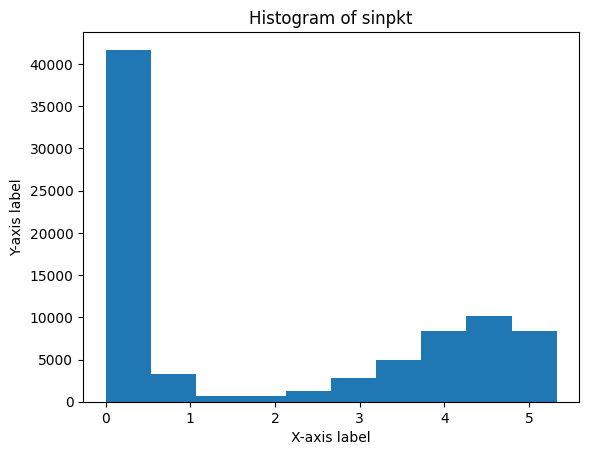

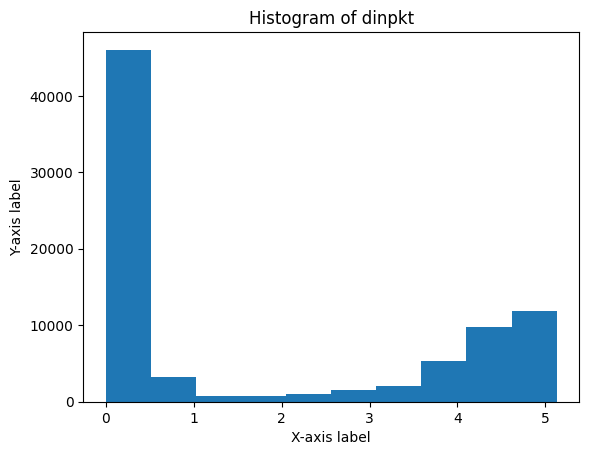

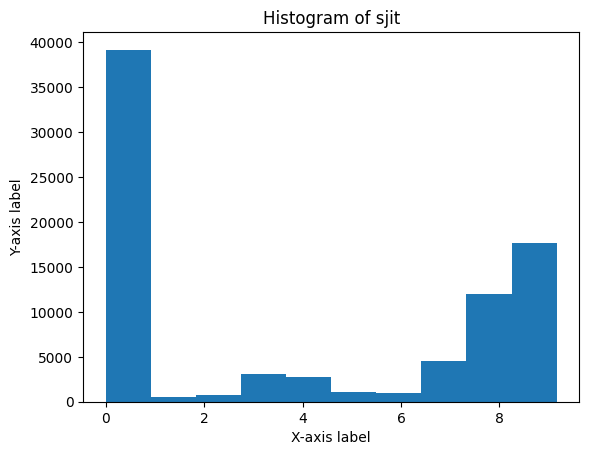

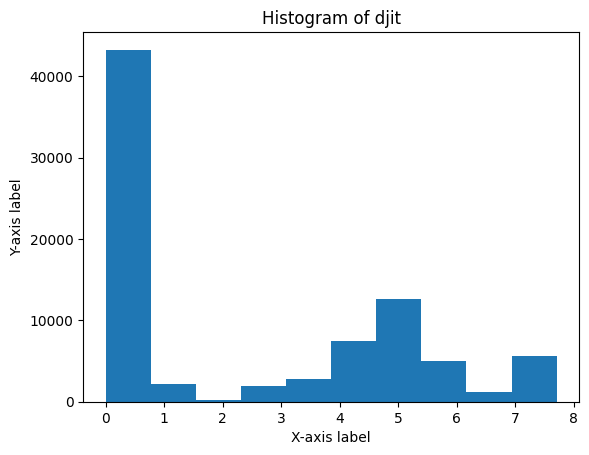

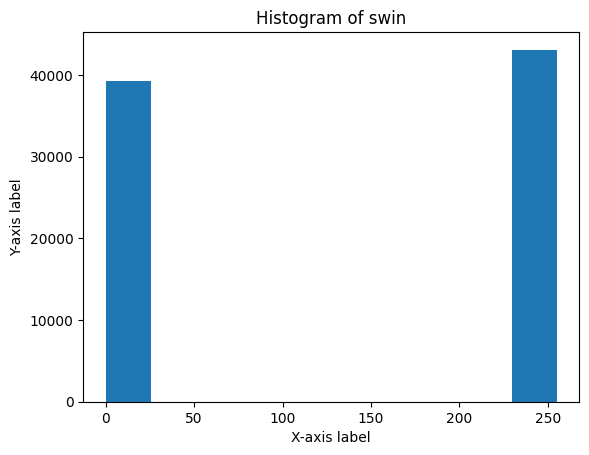

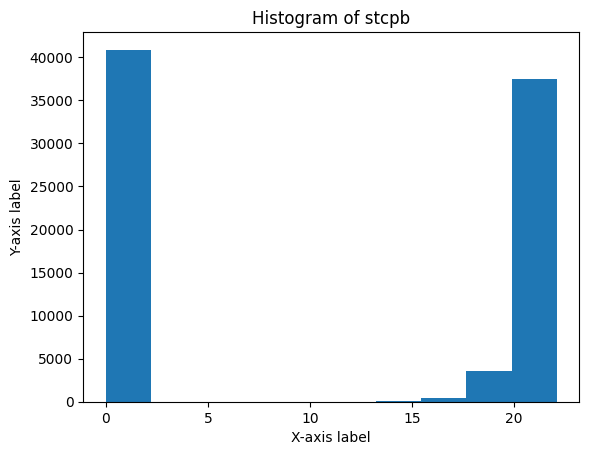

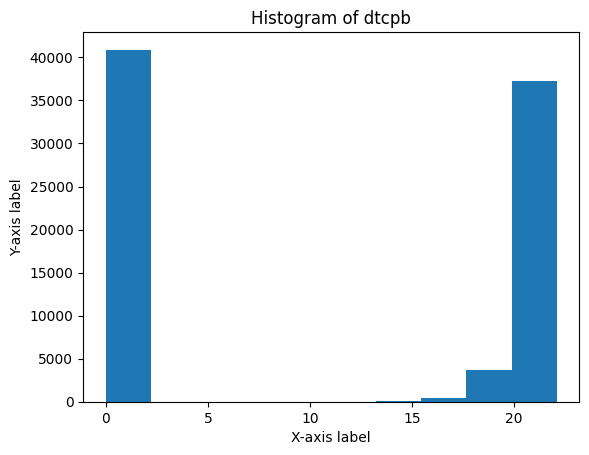

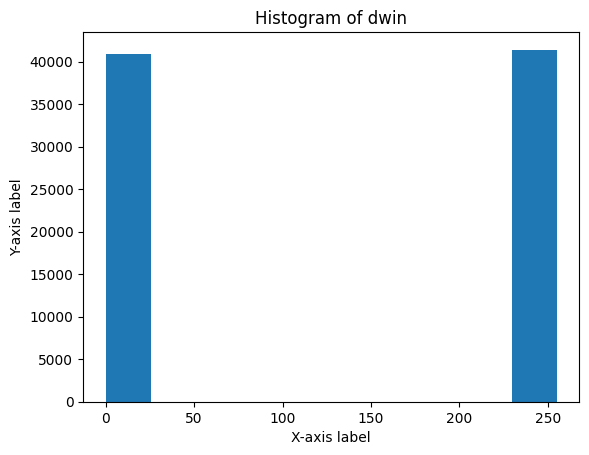

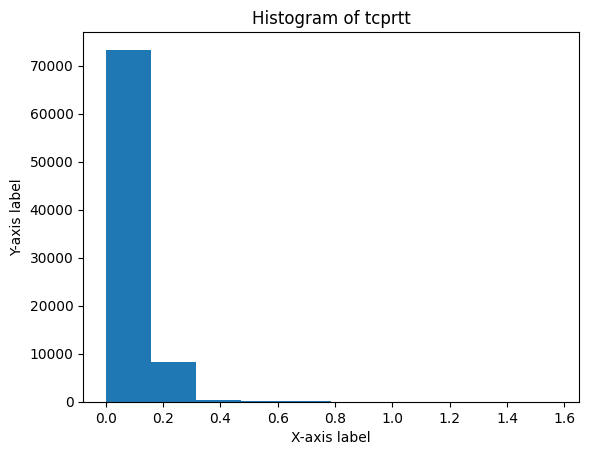

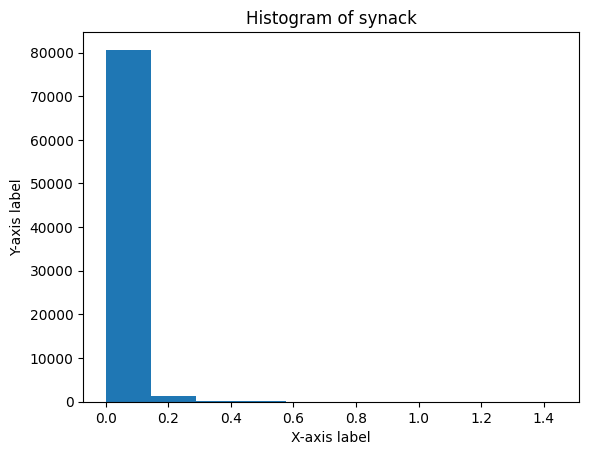

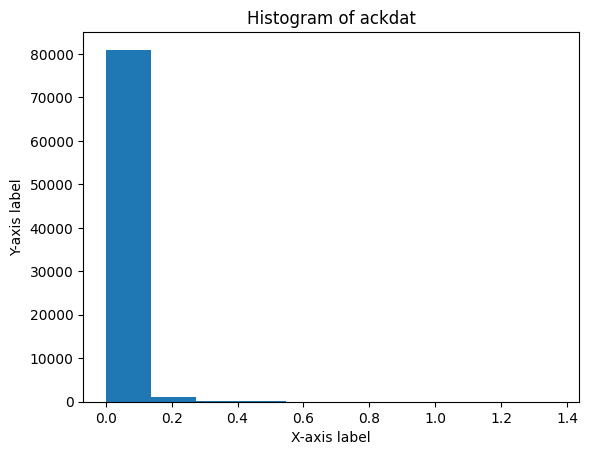

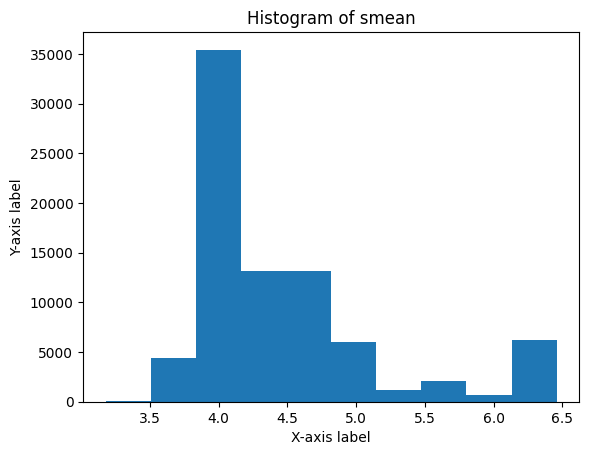

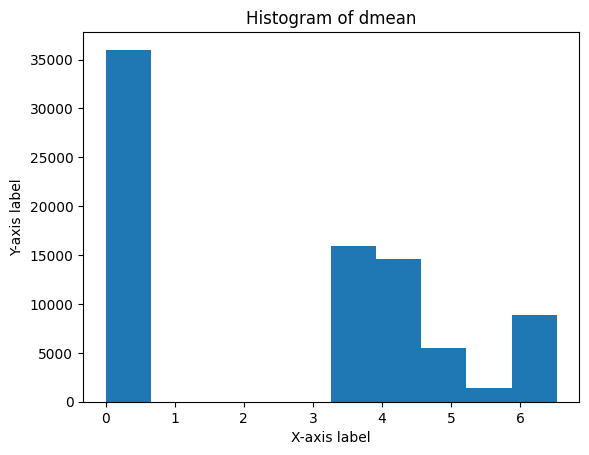

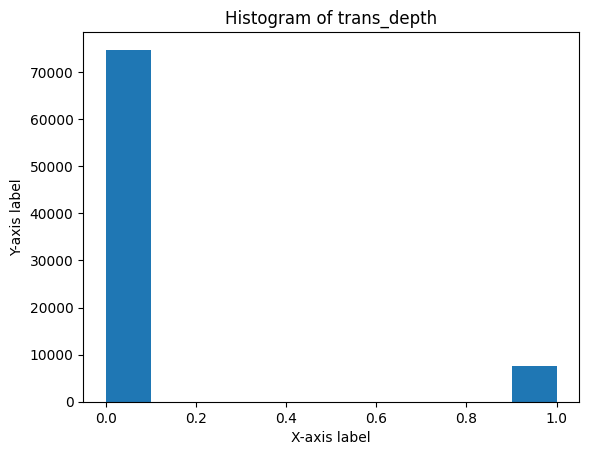

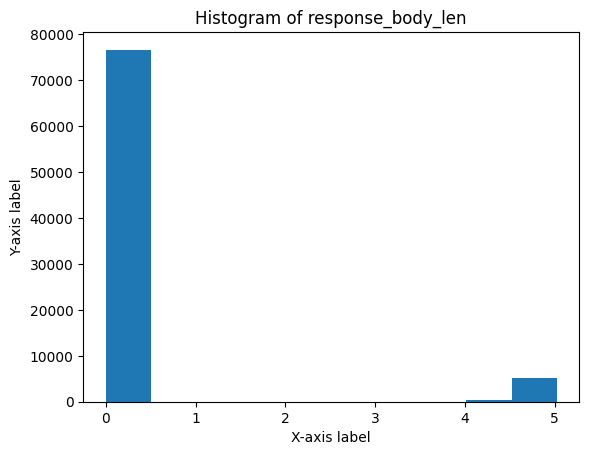

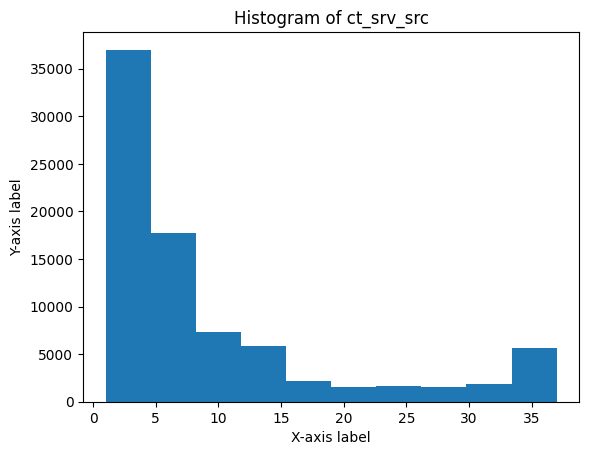

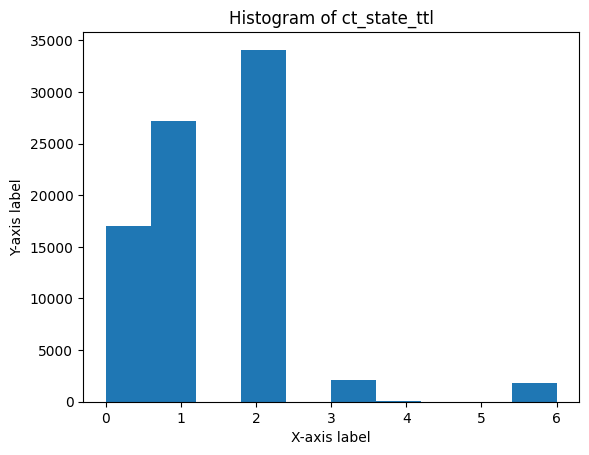

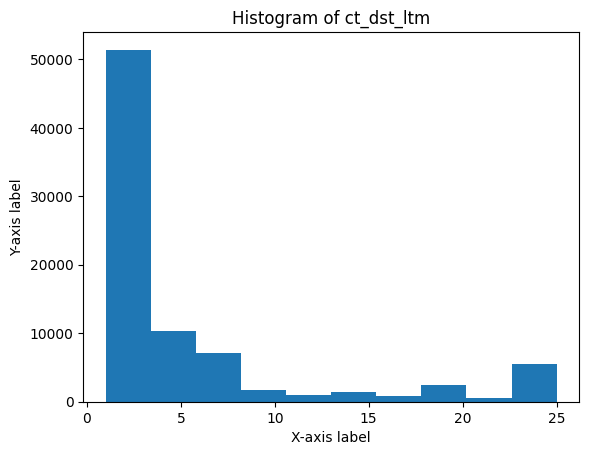

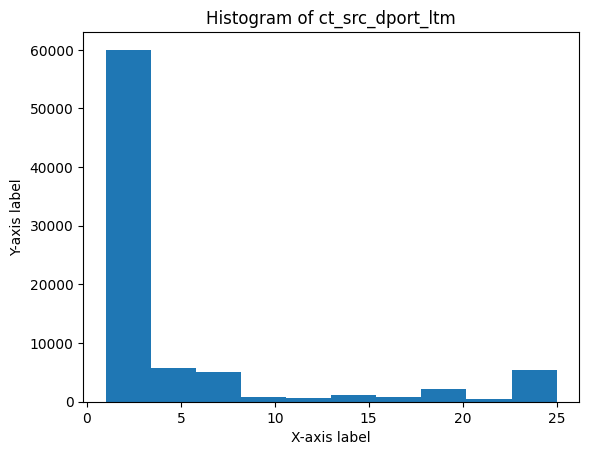

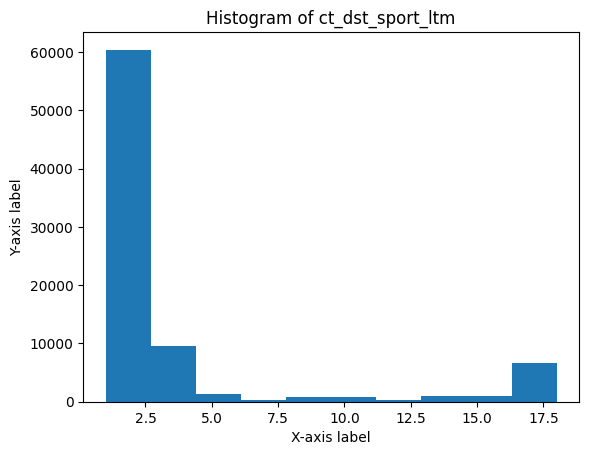

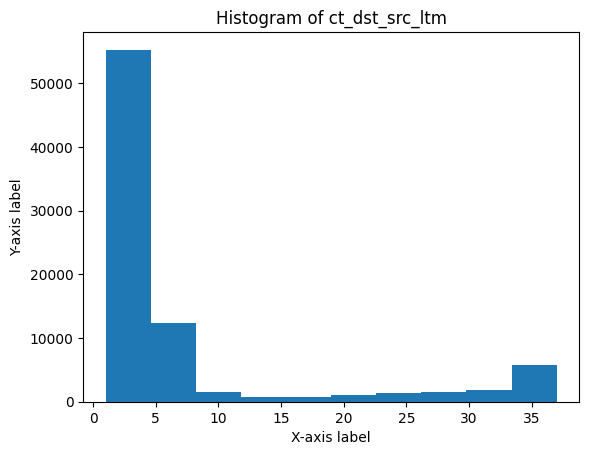

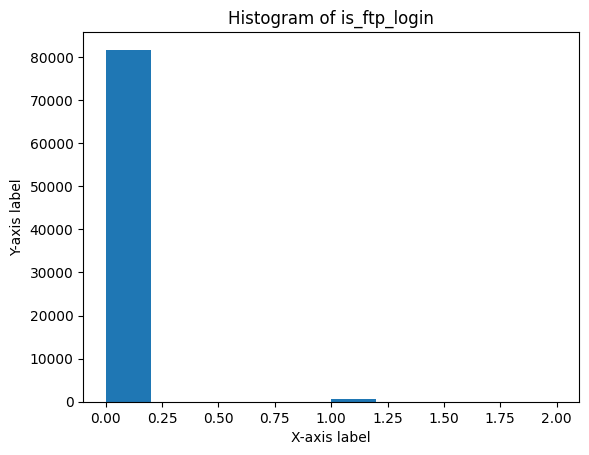

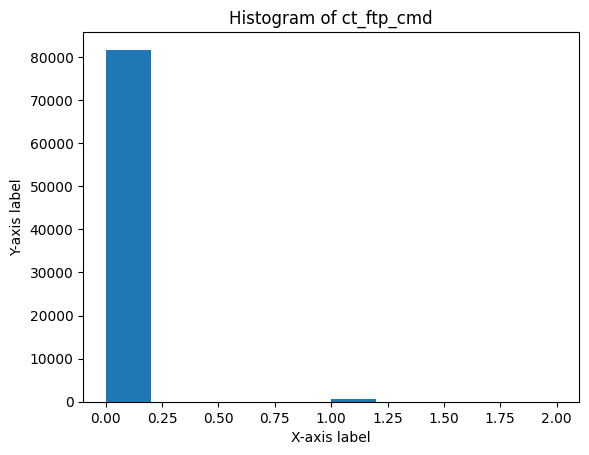

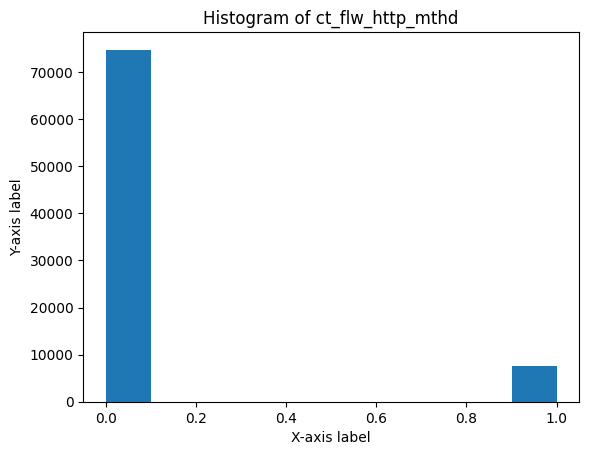

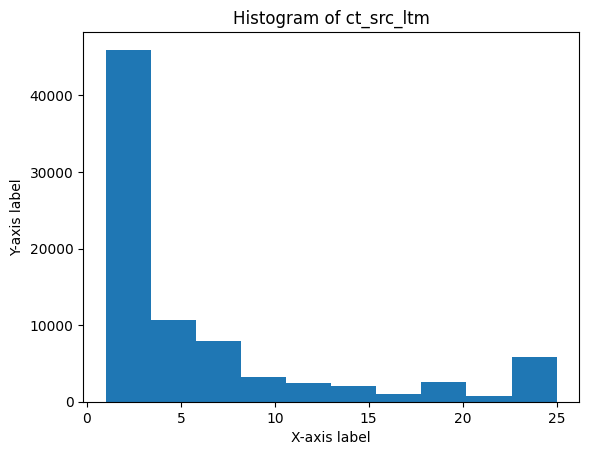

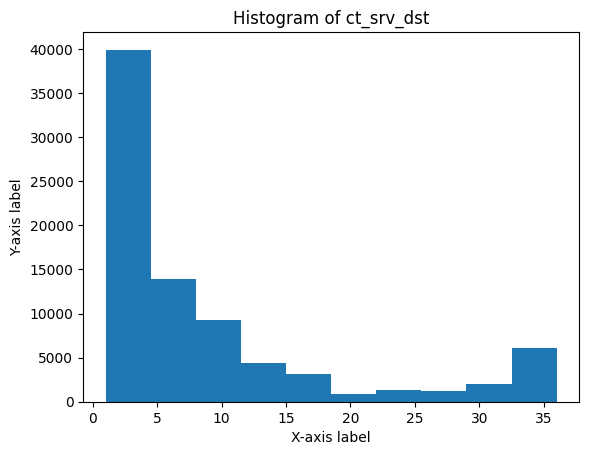

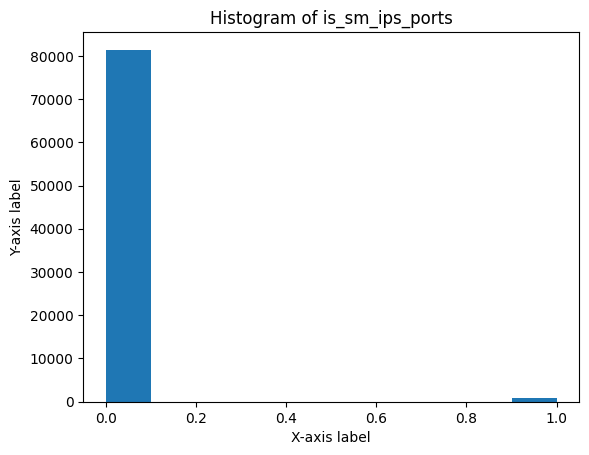

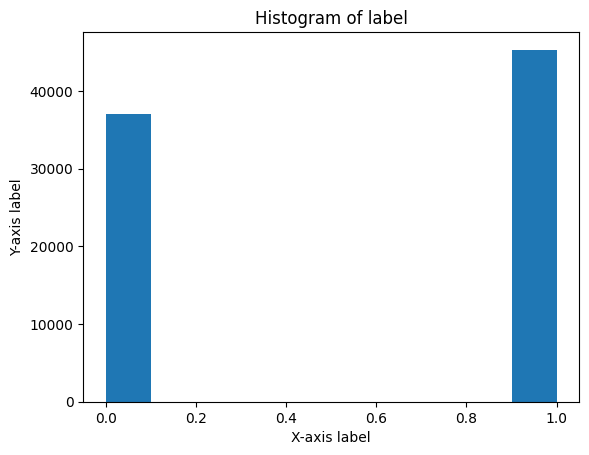

In [ ]:
columns = train.columns
for column in columns:
    plt.hist(train[column], bins=10)
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Histogram of {}'.format(column))
    plt.show()


In [ ]:
#Balanceo de datos con SMOTE y normalizacion de training y testing
oversample = SMOTE()
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train[:, 18:]) #Se normaliza a partir de la 18 porque desde ahi se tiene datos validos.
X_test=scaler.fit_transform(X_test[:, 18:])
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
print(y_test)

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64


#Modelo 1: Regresion Logistica Tradicional (Clasificacion)

Se crea un modelo basico de regresion logistica. Se procede a optimizar los hyperparametros como C que es el inverso de la regularizacion lambda y solver que es la optimizacion (encontrar el minimo de la funcion de costo) y que asigna los pesos al modelo. Al ver que el dataset esta desbalanceado se da mas peso a la clase que tiene ataques. Con el fin de optimizar los hyperparametros se hace un GridSearch que entrena al modelo con las diferentes combinaciones de parametros y obtiene los mejores hyperparametros.

In [ ]:
#Creacion de set de hyperparametros a optimizar siendo C el parametro de regularizacion lambda y solver es como se optimiza y se asigna los pesos al modelo
hyperparametros={
    'C':[0.01, 0.1, 1, 10, 100],
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
}
#Creacion de objeto LogReg se da mas peso a la clase que representa que no hay ataque de red
logreg=LogisticRegression(class_weight={0: 1, 1: 2})
#Optimizacion de hyperparemtros por medio de Cross Validation 5-Splits 2 veces
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
#Grid Search con CV para obtener los mejores hyperparametros
grid_search = GridSearchCV(estimator=logreg, param_grid=hyperparametros, n_jobs=-1, cv=cv)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'solver': 'newton-cg'}


Despues del GridSearch obtenemos los mejores hyper deparametros y este modelo se entrena sobre los datos de entrenamiento y finalmente se hace las predicciones sobre el conjunto de test se obtiene las metricas deseadas. Se hace una matriz de confusion con el fin de ver cuantas predicciones son exactas.

In [ ]:
#Se usa el mejor modelo de la Grid-Search cON LOS hyperparametros
best_model = grid_search.best_estimator_
#Entrenamiento a mejor modelo
best_model.fit(X_train,y_train)
#Se guarda las predicciones
y_predictions = best_model.predict(X_test)
#Se obtiene metricas de accuracy,recall,precision y f1s.
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

Accuracy: 79.68%
Recall: 79.68%
Precision: 82.38%
F1-Score: 80.25%


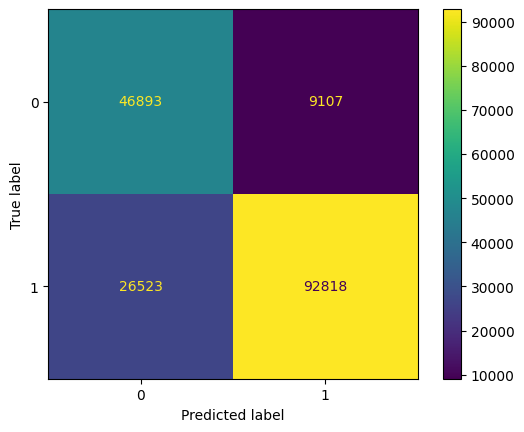

In [ ]:
# Matriz de confusion mostrando positivos negativos
cm = confusion_matrix(y_test, y_predictions, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=best_model.classes_)
disp.plot()
plt.show()

Al ver que el modelo tiene metricas no optimas se procede a cambiar el umbral de decision que originalmente esta en 0.5 verdad y 0.5 falso, probando diferentes porcentajes. Finalmente se escoge un umbral que sea adecuado y se vuelve a crear un modelo que tenga este threshold y los hyperparametros previos. Se obtiene nuevas metricas y se corrobora la mejoria del modelo por medio de una matriz de confusion nueva

In [ ]:
#Creacion de un dataframe que tenga los diferentes thresholds
pred_proba_df = pd.DataFrame(best_model.predict_proba(X_test))
#Lista de thresholds para obtener un mejor accuracy
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
#Se hace predicciones cambiando el threshold, obteniendo diferentes valores de accuracy y cambiando por el mejor. Igualmente se tiene matriz de confusion.
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.9232752180037755
[[ 44138  11862]
 [  1591 117750]]

******** For i = 0.1 ******
Our testing accuracy is 0.9173439184218181
[[ 44794  11206]
 [  3287 116054]]

******** For i = 0.15 ******
Our testing accuracy is 0.9072036774057408
[[ 45236  10764]
 [  5507 113834]]

******** For i = 0.2 ******
Our testing accuracy is 0.8941091929440348
[[ 45580  10420]
 [  8147 111194]]

******** For i = 0.25 ******
Our testing accuracy is 0.8814139305695758
[[ 45922  10078]
 [ 10715 108626]]

******** For i = 0.3 ******
Our testing accuracy is 0.8662891166355844
[[ 46155   9845]
 [ 13600 105741]]

******** For i = 0.35 ******
Our testing accuracy is 0.8467614533965245
[[ 46402   9598]
 [ 17271 102070]]

******** For i = 0.4 ******
Our testing accuracy is 0.8292413069390502
[[46587  9413]
 [20528 98813]]

******** For i = 0.45 ******
Our testing accuracy is 0.8136089106369874
[[46749  9251]
 [23431 95910]]

******** For i = 0.5 ******
Our testing

In [ ]:
#Se escoge el mejor threshold y se vuelve a hacer el proceso hecho anteriormente, obteniendo las metricas seleccionadas. Se puede ver mejoria
best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_proba = best_model.predict_proba(X_test)
new_threshold = 0.05
y_predictions = (y_proba[:, 1] >= new_threshold).astype(int)
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

Accuracy: 92.33%
Recall: 92.33%
Precision: 92.66%
F1-Score: 92.10%


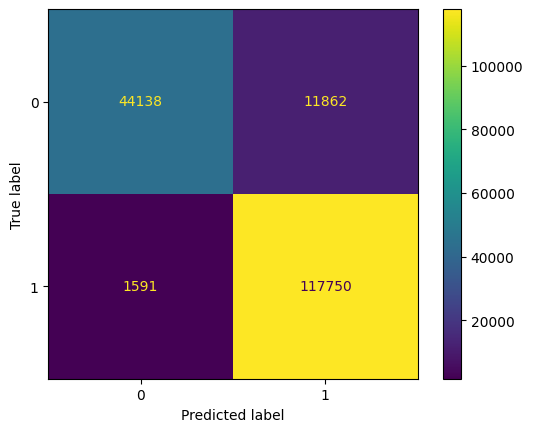

In [ ]:
#Se crea nuevamente una matriz de confusion ahora con el modelo con mejor threshold y hyperparametros. 
cm = confusion_matrix(y_test, y_predictions, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=best_model.classes_)
disp.plot()
plt.show()

# Modelo 2:Red Neuronal


In [ ]:
#Se crea una red neuronal siempre con 3 capas densas y uan capa oculta, con una activasion softmax para la categorizacion de dos clases esperadas
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(38),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
#optimizacion de parametros
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

#callback para detenernos cuando ya no mejore el accuracy
early_stopping = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history=model.fit(X_train,y_train,epochs=64,batch_size=32,callbacks=[early_stopping])

Epoch 1/64
2834/2834 [==============================] - 15s 3ms/step - loss: 0.1921 - accuracy: 0.9163
Epoch 2/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1334 - accuracy: 0.9460
Epoch 3/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1218 - accuracy: 0.9511
Epoch 4/64
2834/2834 [==============================] - 10s 3ms/step - loss: 0.1164 - accuracy: 0.9528
Epoch 5/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1118 - accuracy: 0.9550
Epoch 6/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1088 - accuracy: 0.9558
Epoch 7/64
2834/2834 [==============================] - 10s 3ms/step - loss: 0.1053 - accuracy: 0.9576
Epoch 8/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1033 - accuracy: 0.9582
Epoch 9/64
2834/2834 [==============================] - 9s 3ms/step - loss: 0.1015 - accuracy: 0.9590
Epoch 10/64
2834/2834 [==============================] - 10s 3ms/step - loss: 0

In [ ]:
#evaluacion
model.evaluate(X_test,y_test)

5480/5480 [==============================] - 13s 2ms/step - loss: 0.5722 - accuracy: 0.8961


[0.57220858335495, 0.8961338400840759]

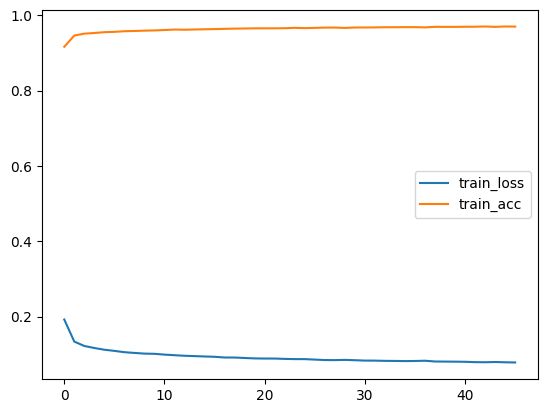

In [ ]:
#Curvas de aprendizaje 
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()
plt.show()

In [ ]:
y_pred_p=model.predict(X_test)
y_pred = np.argmax(y_pred_p, axis=1)

5480/5480 [==============================] - 9s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     56000
           1       0.96      0.88      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.87      0.91      0.89    175341
weighted avg       0.91      0.90      0.90    175341



Podemos evidenciar como en la red neuronal despues de 56 epoch el modelo se detuvo y sacamos un accuracy relativamente alto dentro de nuestro testing set del 90% 

#Modelo 3: Red Neuronal con LTSM

In [ ]:
from array import array
modelstm = tf.keras.models.Sequential([
    tf.keras.layers.Dense(38, input_shape=(1,38,)),
    tf.keras.layers.LSTM(units=128,input_shape=(1,38,), activation='relu'),#excatamente la misma estructura que la red neuronal normal pero con una capa de lstm escondida 
    tf.keras.layers.Dense(2, activation='softmax')
])
#optimizacion de parametros
modelstm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
#Reshape para que la lstm acepte el training set
X_train_array = np.array(X_train)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,38)

In [ ]:
history2=modelstm.fit(X_train_reshaped,y_train,epochs=64,batch_size=32,callbacks=[early_stopping])

Epoch 1/64
2834/2834 [==============================] - 25s 8ms/step - loss: 0.1886 - accuracy: 0.9168
Epoch 2/64
2834/2834 [==============================] - 21s 7ms/step - loss: 0.1294 - accuracy: 0.9471
Epoch 3/64
2834/2834 [==============================] - 23s 8ms/step - loss: 0.1167 - accuracy: 0.9526
Epoch 4/64
2834/2834 [==============================] - 23s 8ms/step - loss: 0.1094 - accuracy: 0.9549
Epoch 5/64
2834/2834 [==============================] - 23s 8ms/step - loss: 0.1061 - accuracy: 0.9561
Epoch 6/64
2834/2834 [==============================] - 22s 8ms/step - loss: 0.1022 - accuracy: 0.9580
Epoch 7/64
2834/2834 [==============================] - 21s 8ms/step - loss: 0.0995 - accuracy: 0.9591
Epoch 8/64
2834/2834 [==============================] - 23s 8ms/step - loss: 0.0967 - accuracy: 0.9606
Epoch 9/64
2834/2834 [==============================] - 21s 7ms/step - loss: 0.0953 - accuracy: 0.9608
Epoch 10/64
2834/2834 [==============================] - 23s 8ms/step - l

In [ ]:
#toca hacer reshape del testing set tambien para que coincidan los formatos
X_test_array = np.array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,38)
modelstm.evaluate(X_test_reshaped,y_test)

5480/5480 [==============================] - 16s 3ms/step - loss: 1.2953 - accuracy: 0.8661


[1.295255184173584, 0.8661293983459473]

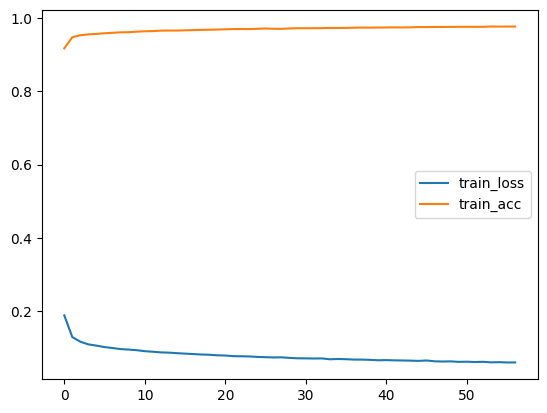

In [ ]:
#Curva de aprendizaje 
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['accuracy'], label='train_acc')
plt.legend()
plt.show()

In [ ]:
y_pred_p=modelstm.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_p, axis=1)

5480/5480 [==============================] - 13s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     56000
           1       0.96      0.84      0.89    119341

    accuracy                           0.87    175341
   macro avg       0.84      0.88      0.86    175341
weighted avg       0.89      0.87      0.87    175341



En la LSTM podemos evidenciar dos cosas importantes, primeramente que el accuracy es menor en el conjunto de testeo en comparacion a la RN normal. Esto puede ser evidencia de un overfitting. 

##Referencias: 
UNSW-NB15 Dataset. (2021). Recuperado de https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/

Preprocesamiento basado en: https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7